# Corporate Prosecution - Exercise B

#### Summary

Looking at corporate prosecutions over time, and the possible assignment of a compliance officer.

#### Files

- cpr-data.xls, "detailed information about every federal organizational prosecution since 2001, as well as deferred and non-prosecution agreements with organizations since 1990"

#### Data Source(s)

The UVA School of Law publishees a [Corpoate Prosecution Registry](http://lib.law.virginia.edu/Garrett/corporate-prosecution-registry/about.html) 

> The goal of this Corporate Prosecutions Registry is to provide comprehensive and up-to-date information on federal organizational prosecutions in the United States, so that we can better understand how corporate prosecutions are brought and resolved. We include detailed information about every federal organizational prosecution since 2001, as well as deferred and non-prosecution agreements with organizations since 1990.

[Corpoate Prosecution Registry](http://lib.law.virginia.edu/Garrett/corporate-prosecution-registry/about.html) 

#### Skills

- Working with CSV files
- Counting and summarizing columns
- Searching with strings
- Extracting with strings

# Read in `cpr-data.csv`

In [117]:
import pandas as pd 
df = pd.read_csv("cpr-data.csv")
df.head()

,REC_ID,COMPANY,DISPOSITION_TYPE,PRIMARY_CRIME_CODE,SWISS_BANK_PROGRAM,USAO,COUNTRY,FINANCIAL_INSTITUTION,CASE_NAME,CASE_ID,DOCKET_NO,DATE,JUDGMENT_DATE,PLEA_DATE,TICKER,US_PUBLIC_CO,ADDITIONAL_REGULATORY_FINE_OR_PAYMENT,COMMUNITY_SERVICE_OR_OTHER,FINE,FORFEITURE_DISGORGEMENT,PROBATION_LENGTH,RESTITUTION,TOTAL_PAYMENT,ACCEPTS_RESPONSIBILITY,AGREEMENT_REQUIRED_NEW_POSITIONS,AGREEMENT_REQUIRED_OUTSIDE_AUDITORS_OR_EXPERTS,CITATION_AND_DESCRIPTION,CIVIL_JUDGMENT_OR_SETTLEMENT,COMPLIANCE_PROGRAM_DESCRIPTION,COMPLIANCE_PROGRAM_REQUIRED_BY_AGREEMENT,COMPLIANCE_REQUIRED_BY_REGULATORS,CRIME_DESC,DESCRIPTION_OF_PAYMENTS,DOES_AGREEMENT_DISCUSS_REASONS_OR_RELEVENT_CONSIDERATIONS_FOR_LENIENCY,DOJ_CAN_UNILATERALLY_TERMINATE,FINE_CALCULATION_INCLUDED,FINE_DESCRIPTION,INDEP_MONITOR_REQUIRED,MUST_COMPORT_WITH_USSG_OR_AUDIT_COMPLIANCE,OTHER_AGREEMENT,OTHER_AGREEMENT_REQUIRED_GOVERNANCE_CHANGES,OTHER_COMPLIANCE_OFFICER_OR_CONSULTANT_REQUIRED,PARALLEL_CIVIL_SUIT,PARALLEL_REGULATORY_ACTION_OR_LOCAL_PROSECUTOR,PRE_AGREEMENT_COMPLIANCE,PRE_AGREEMENT_COMPLIANCE_DESCRIPTION,PRIVACY_WAIVER,REGULATORY_DISGORGEMENT_RESTITUTION_FORFEITURE,REGULATORY_FINE,REG_AGENCY,STATEMENT_OF_FACTS,TOTAL_REGULATORY,UNRELATED_TERMS,AGMT_YEAR,SOURCE,NOTES
0,138,"1st Union Transfer and Telegraph, Inc.",plea,Money Laundering,NaN,Virginia - Eastern District,United States,Yes,USA v. 1st Union Transfer,4:03-cr-00024,8,2003-06-17,2003-06-17,2003-02-28,NaN,No,nan,nan,0.00,"272,734.00",12.00,nan,272734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,003.00",PACER,NaN
1,139,"3D Poultry Loading, Inc.",plea,Immigration,NaN,Arkansas - Western District,United States,No,USA v. 3D Poultry Loading,2:04-cr-20061,7,2005-01-25,2005-01-25,2004-09-30,NaN,No,nan,nan,"24,000.00",nan,36.00,nan,24000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,005.00",PACER,NaN
2,2529,"3rd & Bell, LLC",plea,Immigration,NaN,Arizona,United States,No,USA v. Danny's Management Services LLC et al,2:13-cr-01143,510,2014-11-21,2014-11-21,2014-11-20,NaN,No,0.00,0.00,50.00,0.00,0.00,0.00,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,014.00",PACER,NaN
3,822,41 Market Inc.,plea,Controlled substances / Drugs / Meth Act,NaN,Georgia - Northern District,United States,No,USA v. 41 Market Inc.,4:06-cr-00023,11,2006-07-05,2006-07-05,2006-03-16,NaN,No,nan,nan,"14,640.00",nan,36.00,nan,14640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,006.00",PACER,NaN
4,140,"45,000, Inc.",plea,Environmental,NaN,Louisiana - Middle District,United States,No,USA v. 45000 Inc,3:04-cr-00180,17,2005-06-03,2005-06-03,2004-11-22,NaN,No,nan,nan,"25,000.00",nan,0.00,"2,500.00",27500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,005.00",PACER,NaN


### Check that your dataframe has 3038 rows and 56 columns.

In [118]:
df.shape

(3038, 56)

### List the columns and their data types

In [119]:
df.dtypes

REC_ID                                                                      int64
COMPANY                                                                    object
DISPOSITION_TYPE                                                           object
PRIMARY_CRIME_CODE                                                         object
SWISS_BANK_PROGRAM                                                         object
USAO                                                                       object
COUNTRY                                                                    object
FINANCIAL_INSTITUTION                                                      object
CASE_NAME                                                                  object
CASE_ID                                                                    object
DOCKET_NO                                                                  object
DATE                                                                       object
JUDGMENT_DATE   

### What do the following columns mean?

- PRIMARY_CRIME_CODE
- DISPOSITION_TYPE
- AGREEMENT_TYPE
- COUNTRY
- FINE
- TOTAL_PAYMENT
- USAO
- PROBATION_LENGTH
- AGREEMENT_REQUIRED_NEW_POSITIONS
- INDEP_MONITOR_REQUIRED

# Customizing the display in pandas

See how the middle of the table has a `...`? Let's fix that.

## How do you see the number of columns pandas will display?

In [120]:
pd.options.display.max_columns

65

## Set pandas to display 65 columns

In [121]:
pd.set_option('display.max_columns',65)

In [122]:
df.head()

,REC_ID,COMPANY,DISPOSITION_TYPE,PRIMARY_CRIME_CODE,SWISS_BANK_PROGRAM,USAO,COUNTRY,FINANCIAL_INSTITUTION,CASE_NAME,CASE_ID,DOCKET_NO,DATE,JUDGMENT_DATE,PLEA_DATE,TICKER,US_PUBLIC_CO,ADDITIONAL_REGULATORY_FINE_OR_PAYMENT,COMMUNITY_SERVICE_OR_OTHER,FINE,FORFEITURE_DISGORGEMENT,PROBATION_LENGTH,RESTITUTION,TOTAL_PAYMENT,ACCEPTS_RESPONSIBILITY,AGREEMENT_REQUIRED_NEW_POSITIONS,AGREEMENT_REQUIRED_OUTSIDE_AUDITORS_OR_EXPERTS,CITATION_AND_DESCRIPTION,CIVIL_JUDGMENT_OR_SETTLEMENT,COMPLIANCE_PROGRAM_DESCRIPTION,COMPLIANCE_PROGRAM_REQUIRED_BY_AGREEMENT,COMPLIANCE_REQUIRED_BY_REGULATORS,CRIME_DESC,DESCRIPTION_OF_PAYMENTS,DOES_AGREEMENT_DISCUSS_REASONS_OR_RELEVENT_CONSIDERATIONS_FOR_LENIENCY,DOJ_CAN_UNILATERALLY_TERMINATE,FINE_CALCULATION_INCLUDED,FINE_DESCRIPTION,INDEP_MONITOR_REQUIRED,MUST_COMPORT_WITH_USSG_OR_AUDIT_COMPLIANCE,OTHER_AGREEMENT,OTHER_AGREEMENT_REQUIRED_GOVERNANCE_CHANGES,OTHER_COMPLIANCE_OFFICER_OR_CONSULTANT_REQUIRED,PARALLEL_CIVIL_SUIT,PARALLEL_REGULATORY_ACTION_OR_LOCAL_PROSECUTOR,PRE_AGREEMENT_COMPLIANCE,PRE_AGREEMENT_COMPLIANCE_DESCRIPTION,PRIVACY_WAIVER,REGULATORY_DISGORGEMENT_RESTITUTION_FORFEITURE,REGULATORY_FINE,REG_AGENCY,STATEMENT_OF_FACTS,TOTAL_REGULATORY,UNRELATED_TERMS,AGMT_YEAR,SOURCE,NOTES
0,138,"1st Union Transfer and Telegraph, Inc.",plea,Money Laundering,NaN,Virginia - Eastern District,United States,Yes,USA v. 1st Union Transfer,4:03-cr-00024,8,2003-06-17,2003-06-17,2003-02-28,NaN,No,nan,nan,0.00,"272,734.00",12.00,nan,272734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,003.00",PACER,NaN
1,139,"3D Poultry Loading, Inc.",plea,Immigration,NaN,Arkansas - Western District,United States,No,USA v. 3D Poultry Loading,2:04-cr-20061,7,2005-01-25,2005-01-25,2004-09-30,NaN,No,nan,nan,"24,000.00",nan,36.00,nan,24000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,005.00",PACER,NaN
2,2529,"3rd & Bell, LLC",plea,Immigration,NaN,Arizona,United States,No,USA v. Danny's Management Services LLC et al,2:13-cr-01143,510,2014-11-21,2014-11-21,2014-11-20,NaN,No,0.00,0.00,50.00,0.00,0.00,0.00,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,014.00",PACER,NaN
3,822,41 Market Inc.,plea,Controlled substances / Drugs / Meth Act,NaN,Georgia - Northern District,United States,No,USA v. 41 Market Inc.,4:06-cr-00023,11,2006-07-05,2006-07-05,2006-03-16,NaN,No,nan,nan,"14,640.00",nan,36.00,nan,14640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,006.00",PACER,NaN
4,140,"45,000, Inc.",plea,Environmental,NaN,Louisiana - Middle District,United States,No,USA v. 45000 Inc,3:04-cr-00180,17,2005-06-03,2005-06-03,2004-11-22,NaN,No,nan,nan,"25,000.00",nan,0.00,"2,500.00",27500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,005.00",PACER,NaN


## How do you see the number of rows pandas will display? Then, set it to display 100 rows at a time.

What does "the number rows pandas will display" actually mean?

In [123]:
pd.options.display.max_rows

100

In [124]:
pd.set_option('display.max_rows', 100)
df.head()

,REC_ID,COMPANY,DISPOSITION_TYPE,PRIMARY_CRIME_CODE,SWISS_BANK_PROGRAM,USAO,COUNTRY,FINANCIAL_INSTITUTION,CASE_NAME,CASE_ID,DOCKET_NO,DATE,JUDGMENT_DATE,PLEA_DATE,TICKER,US_PUBLIC_CO,ADDITIONAL_REGULATORY_FINE_OR_PAYMENT,COMMUNITY_SERVICE_OR_OTHER,FINE,FORFEITURE_DISGORGEMENT,PROBATION_LENGTH,RESTITUTION,TOTAL_PAYMENT,ACCEPTS_RESPONSIBILITY,AGREEMENT_REQUIRED_NEW_POSITIONS,AGREEMENT_REQUIRED_OUTSIDE_AUDITORS_OR_EXPERTS,CITATION_AND_DESCRIPTION,CIVIL_JUDGMENT_OR_SETTLEMENT,COMPLIANCE_PROGRAM_DESCRIPTION,COMPLIANCE_PROGRAM_REQUIRED_BY_AGREEMENT,COMPLIANCE_REQUIRED_BY_REGULATORS,CRIME_DESC,DESCRIPTION_OF_PAYMENTS,DOES_AGREEMENT_DISCUSS_REASONS_OR_RELEVENT_CONSIDERATIONS_FOR_LENIENCY,DOJ_CAN_UNILATERALLY_TERMINATE,FINE_CALCULATION_INCLUDED,FINE_DESCRIPTION,INDEP_MONITOR_REQUIRED,MUST_COMPORT_WITH_USSG_OR_AUDIT_COMPLIANCE,OTHER_AGREEMENT,OTHER_AGREEMENT_REQUIRED_GOVERNANCE_CHANGES,OTHER_COMPLIANCE_OFFICER_OR_CONSULTANT_REQUIRED,PARALLEL_CIVIL_SUIT,PARALLEL_REGULATORY_ACTION_OR_LOCAL_PROSECUTOR,PRE_AGREEMENT_COMPLIANCE,PRE_AGREEMENT_COMPLIANCE_DESCRIPTION,PRIVACY_WAIVER,REGULATORY_DISGORGEMENT_RESTITUTION_FORFEITURE,REGULATORY_FINE,REG_AGENCY,STATEMENT_OF_FACTS,TOTAL_REGULATORY,UNRELATED_TERMS,AGMT_YEAR,SOURCE,NOTES
0,138,"1st Union Transfer and Telegraph, Inc.",plea,Money Laundering,NaN,Virginia - Eastern District,United States,Yes,USA v. 1st Union Transfer,4:03-cr-00024,8,2003-06-17,2003-06-17,2003-02-28,NaN,No,nan,nan,0.00,"272,734.00",12.00,nan,272734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,003.00",PACER,NaN
1,139,"3D Poultry Loading, Inc.",plea,Immigration,NaN,Arkansas - Western District,United States,No,USA v. 3D Poultry Loading,2:04-cr-20061,7,2005-01-25,2005-01-25,2004-09-30,NaN,No,nan,nan,"24,000.00",nan,36.00,nan,24000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,005.00",PACER,NaN
2,2529,"3rd & Bell, LLC",plea,Immigration,NaN,Arizona,United States,No,USA v. Danny's Management Services LLC et al,2:13-cr-01143,510,2014-11-21,2014-11-21,2014-11-20,NaN,No,0.00,0.00,50.00,0.00,0.00,0.00,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,014.00",PACER,NaN
3,822,41 Market Inc.,plea,Controlled substances / Drugs / Meth Act,NaN,Georgia - Northern District,United States,No,USA v. 41 Market Inc.,4:06-cr-00023,11,2006-07-05,2006-07-05,2006-03-16,NaN,No,nan,nan,"14,640.00",nan,36.00,nan,14640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,006.00",PACER,NaN
4,140,"45,000, Inc.",plea,Environmental,NaN,Louisiana - Middle District,United States,No,USA v. 45000 Inc,3:04-cr-00180,17,2005-06-03,2005-06-03,2004-11-22,NaN,No,nan,nan,"25,000.00",nan,0.00,"2,500.00",27500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,005.00",PACER,NaN


## Describe the TOTAL_PAYMENT column to me numerically - maxes, mins, averages.

Do this in **one line.**

In [125]:
df['TOTAL_PAYMENT'].describe()

count           3,038.00
mean       22,842,732.11
std       155,697,740.02
min                 0.00
25%            21,892.00
50%           200,000.00
75%         2,100,000.00
max     4,486,800,000.00
Name: TOTAL_PAYMENT, dtype: float64

### Oh that's ugly ugly ugly. Set pandas to format floats with 2 decimal points, we probably don't need to be more specific than that. Oh, and tell it to use a `,` in the thousands position!

I'm just going to leave [this here](http://infohost.nmt.edu/~shipman/doc/python27/web/new-str-format.html) for reference. You should definitely come up and ask on the board, though.

In [126]:
pd.set_option("display.float_format", '{:,.2f}'.format)
df.FINE.describe()

count           2,908.00
mean       13,536,173.99
std        85,486,442.07
min                 0.00
25%             1,000.00
50%            70,000.00
75%         1,000,000.00
max     2,800,000,000.00
Name: FINE, dtype: float64

## Look at the fine and the forfeiture disgorgement for the first two rows. Pretty nice!

In [127]:
df.head(2)

,REC_ID,COMPANY,DISPOSITION_TYPE,PRIMARY_CRIME_CODE,SWISS_BANK_PROGRAM,USAO,COUNTRY,FINANCIAL_INSTITUTION,CASE_NAME,CASE_ID,DOCKET_NO,DATE,JUDGMENT_DATE,PLEA_DATE,TICKER,US_PUBLIC_CO,ADDITIONAL_REGULATORY_FINE_OR_PAYMENT,COMMUNITY_SERVICE_OR_OTHER,FINE,FORFEITURE_DISGORGEMENT,PROBATION_LENGTH,RESTITUTION,TOTAL_PAYMENT,ACCEPTS_RESPONSIBILITY,AGREEMENT_REQUIRED_NEW_POSITIONS,AGREEMENT_REQUIRED_OUTSIDE_AUDITORS_OR_EXPERTS,CITATION_AND_DESCRIPTION,CIVIL_JUDGMENT_OR_SETTLEMENT,COMPLIANCE_PROGRAM_DESCRIPTION,COMPLIANCE_PROGRAM_REQUIRED_BY_AGREEMENT,COMPLIANCE_REQUIRED_BY_REGULATORS,CRIME_DESC,DESCRIPTION_OF_PAYMENTS,DOES_AGREEMENT_DISCUSS_REASONS_OR_RELEVENT_CONSIDERATIONS_FOR_LENIENCY,DOJ_CAN_UNILATERALLY_TERMINATE,FINE_CALCULATION_INCLUDED,FINE_DESCRIPTION,INDEP_MONITOR_REQUIRED,MUST_COMPORT_WITH_USSG_OR_AUDIT_COMPLIANCE,OTHER_AGREEMENT,OTHER_AGREEMENT_REQUIRED_GOVERNANCE_CHANGES,OTHER_COMPLIANCE_OFFICER_OR_CONSULTANT_REQUIRED,PARALLEL_CIVIL_SUIT,PARALLEL_REGULATORY_ACTION_OR_LOCAL_PROSECUTOR,PRE_AGREEMENT_COMPLIANCE,PRE_AGREEMENT_COMPLIANCE_DESCRIPTION,PRIVACY_WAIVER,REGULATORY_DISGORGEMENT_RESTITUTION_FORFEITURE,REGULATORY_FINE,REG_AGENCY,STATEMENT_OF_FACTS,TOTAL_REGULATORY,UNRELATED_TERMS,AGMT_YEAR,SOURCE,NOTES
0,138,"1st Union Transfer and Telegraph, Inc.",plea,Money Laundering,NaN,Virginia - Eastern District,United States,Yes,USA v. 1st Union Transfer,4:03-cr-00024,8,2003-06-17,2003-06-17,2003-02-28,NaN,No,nan,nan,0.00,"272,734.00",12.00,nan,272734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,003.00",PACER,NaN
1,139,"3D Poultry Loading, Inc.",plea,Immigration,NaN,Arkansas - Western District,United States,No,USA v. 3D Poultry Loading,2:04-cr-20061,7,2005-01-25,2005-01-25,2004-09-30,NaN,No,nan,nan,"24,000.00",nan,36.00,nan,24000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,005.00",PACER,NaN


# A little summarizing

## How many of cases actually went to trial? How did most of these cases arrive at a decision?

In [128]:
df['DISPOSITION_TYPE'].value_counts()

plea               2565
NP                  266
DP                  201
trial convicton       2
declination           2
dismissal             2
Name: DISPOSITION_TYPE, dtype: int64

### Graph the previous answer, with the longest bar on top

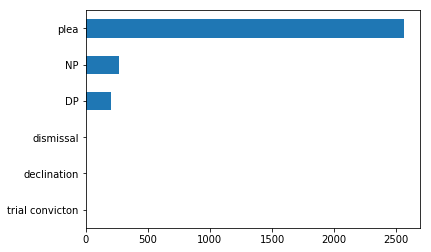

In [129]:
%matplotlib inline
df['DISPOSITION_TYPE'].value_counts().sort_values().plot(kind="barh")

## What's the distribution of total payments look like?

In [130]:
%matplotlib inline

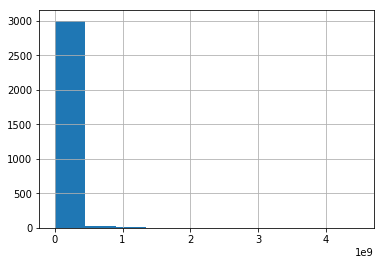

In [131]:
df['TOTAL_PAYMENT'].hist(bins=10)

## Sort by total payments, descending

In [132]:
df['TOTAL_PAYMENT'].sort_values(ascending=False).head()

307     4486800000
309     4000000000
2913    2800000000
1000    2003000000
753     1803488986
Name: TOTAL_PAYMENT, dtype: int64

# Column selection

We wanted to view all of those rows, but honestly that's a little silly. **We can't actually see the data we want!** Let's just select the ones we care about.

## Create a new dataframe that only includes the company name, disposition type, total payment, and date.

In [133]:
df_new = df[['COMPANY', 'DISPOSITION_TYPE', 'TOTAL_PAYMENT', 'DATE']]
df_new.head()

,COMPANY,DISPOSITION_TYPE,TOTAL_PAYMENT,DATE
0,"1st Union Transfer and Telegraph, Inc.",plea,272734,2003-06-17
1,"3D Poultry Loading, Inc.",plea,24000,2005-01-25
2,"3rd & Bell, LLC",plea,50,2014-11-21
3,41 Market Inc.,plea,14640,2006-07-05
4,"45,000, Inc.",plea,27500,2005-06-03


## Confirm it has 3038 rows and 5 columns

In [134]:
df_new.shape

(3038, 4)

## Using this subset, extract the year into a separate column called `year`

Your machine will complain. **Let's talk about that error.**

In [135]:
df_new['YEAR'] = df_new['DATE'].str.extract('(\d{4}).*', expand=False)
df_new.head()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,COMPANY,DISPOSITION_TYPE,TOTAL_PAYMENT,DATE,YEAR
0,"1st Union Transfer and Telegraph, Inc.",plea,272734,2003-06-17,2003
1,"3D Poultry Loading, Inc.",plea,24000,2005-01-25,2005
2,"3rd & Bell, LLC",plea,50,2014-11-21,2014
3,41 Market Inc.,plea,14640,2006-07-05,2006
4,"45,000, Inc.",plea,27500,2005-06-03,2005


## Make the 'year' column an integer.

Or at least *try*, then turn it into a float. Why did one work but the other didn't?

In [136]:
df_new['YEAR'] = df_new['YEAR'].astype(float)
df_new.dtypes

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


COMPANY              object
DISPOSITION_TYPE     object
TOTAL_PAYMENT         int64
DATE                 object
YEAR                float64
dtype: object

## Make a histogram of cases over the years

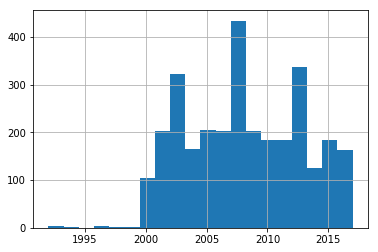

In [137]:
df_new['YEAR'].hist(bins=20)

## What was the total amount paid across all cases each year?

In [138]:
df_new.groupby('YEAR')['TOTAL_PAYMENT'].sum()

YEAR
1,992.00             0
1,993.00             0
1,994.00             0
1,996.00             0
1,998.00             0
1,999.00             0
2,000.00     278206161
2,001.00     761777886
2,002.00     829424749
2,003.00     911162220
2,004.00    1637537063
2,005.00    4210235461
2,006.00    1201775794
2,007.00    3034830498
2,008.00    2729966187
2,009.00    4090513821
2,010.00    4745389066
2,011.00    2957950912
2,012.00    6696816915
2,013.00    7724920476
2,014.00    7062535053
2,015.00    9844845643
2,016.00    3808529923
2,017.00    6866002335
Name: TOTAL_PAYMENT, dtype: int64

## Graph it!

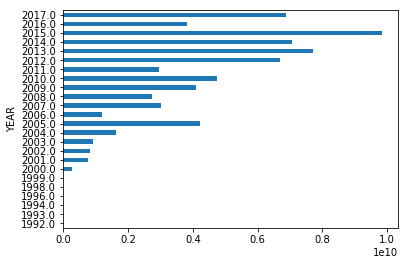

In [139]:
df_new.groupby('YEAR')['TOTAL_PAYMENT'].sum().plot(kind='barh')

# Cleaning up a column

Take a look at **AGREEMENT_REQUIRED_NEW_POSITIONS** in your **ORIGINAL DATAFRAME**. How many times does it have a value in it?

- Tip: There are a few ways to do this. Maybe you want to ask for an easy one!

In [140]:
df['AGREEMENT_REQUIRED_NEW_POSITIONS'].notnull().value_counts()

False    2777
True      261
Name: AGREEMENT_REQUIRED_NEW_POSITIONS, dtype: int64

### What are the top 5 responses for `AGREEMENT_REQUIRED_NEW_POSITIONS`?

In [141]:
df['AGREEMENT_REQUIRED_NEW_POSITIONS'].value_counts().head()

No                                                                                       163
Yes; Assignment one or more senior officers to compliance, with reporting obligations     46
Yes; Compliance Officer                                                                    6
Yes; Chief Compliance Officer                                                              6
Yes; Compliance officer                                                                    3
Name: AGREEMENT_REQUIRED_NEW_POSITIONS, dtype: int64

## That looks messy.

### HOLD ON, time to learn something

**There are a few ways to do the next question**, but a couple popular methods will have pandas yell at you. You might want to try this new thing called `loc`! **It is used to update a column in a row based on a condition.**

```
df.loc[df.country == 'Angola', "continent"] = "Africa"
```

This updates the `continent` column to be `Africa` for every row where `df.country == 'Angola'`. You CANNOT do the following, which is probably what you've wanted to do:

```
df[df.country == 'Angola']['continent'] = 'Africa'
```

And now you know.

## Start to this up by creating a new column called `required_new_position`.

This column should be `True` if a new position was required, `False` if a new position was not required, and `NaN` if it's unknown.

- Tip: You should use `.str.contains`
- Tip: Do you know how to say "at the start of a line" using regex?
- Tip: We've talked about how to avoid `cannot index with vector containing NA / NaN values` but if you get it feel free to write it on the board

In [142]:
df.loc[df.AGREEMENT_REQUIRED_NEW_POSITIONS.notnull(), 'required_new_position'] = df.AGREEMENT_REQUIRED_NEW_POSITIONS.str.extract(r"^\b(\w*)\b")
df.head()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


,REC_ID,COMPANY,DISPOSITION_TYPE,PRIMARY_CRIME_CODE,SWISS_BANK_PROGRAM,USAO,COUNTRY,FINANCIAL_INSTITUTION,CASE_NAME,CASE_ID,DOCKET_NO,DATE,JUDGMENT_DATE,PLEA_DATE,TICKER,US_PUBLIC_CO,ADDITIONAL_REGULATORY_FINE_OR_PAYMENT,COMMUNITY_SERVICE_OR_OTHER,FINE,FORFEITURE_DISGORGEMENT,PROBATION_LENGTH,RESTITUTION,TOTAL_PAYMENT,ACCEPTS_RESPONSIBILITY,AGREEMENT_REQUIRED_NEW_POSITIONS,AGREEMENT_REQUIRED_OUTSIDE_AUDITORS_OR_EXPERTS,CITATION_AND_DESCRIPTION,CIVIL_JUDGMENT_OR_SETTLEMENT,COMPLIANCE_PROGRAM_DESCRIPTION,COMPLIANCE_PROGRAM_REQUIRED_BY_AGREEMENT,COMPLIANCE_REQUIRED_BY_REGULATORS,CRIME_DESC,DESCRIPTION_OF_PAYMENTS,DOES_AGREEMENT_DISCUSS_REASONS_OR_RELEVENT_CONSIDERATIONS_FOR_LENIENCY,DOJ_CAN_UNILATERALLY_TERMINATE,FINE_CALCULATION_INCLUDED,FINE_DESCRIPTION,INDEP_MONITOR_REQUIRED,MUST_COMPORT_WITH_USSG_OR_AUDIT_COMPLIANCE,OTHER_AGREEMENT,OTHER_AGREEMENT_REQUIRED_GOVERNANCE_CHANGES,OTHER_COMPLIANCE_OFFICER_OR_CONSULTANT_REQUIRED,PARALLEL_CIVIL_SUIT,PARALLEL_REGULATORY_ACTION_OR_LOCAL_PROSECUTOR,PRE_AGREEMENT_COMPLIANCE,PRE_AGREEMENT_COMPLIANCE_DESCRIPTION,PRIVACY_WAIVER,REGULATORY_DISGORGEMENT_RESTITUTION_FORFEITURE,REGULATORY_FINE,REG_AGENCY,STATEMENT_OF_FACTS,TOTAL_REGULATORY,UNRELATED_TERMS,AGMT_YEAR,SOURCE,NOTES,required_new_position
0,138,"1st Union Transfer and Telegraph, Inc.",plea,Money Laundering,NaN,Virginia - Eastern District,United States,Yes,USA v. 1st Union Transfer,4:03-cr-00024,8,2003-06-17,2003-06-17,2003-02-28,NaN,No,nan,nan,0.00,"272,734.00",12.00,nan,272734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,003.00",PACER,NaN,NaN
1,139,"3D Poultry Loading, Inc.",plea,Immigration,NaN,Arkansas - Western District,United States,No,USA v. 3D Poultry Loading,2:04-cr-20061,7,2005-01-25,2005-01-25,2004-09-30,NaN,No,nan,nan,"24,000.00",nan,36.00,nan,24000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,005.00",PACER,NaN,NaN
2,2529,"3rd & Bell, LLC",plea,Immigration,NaN,Arizona,United States,No,USA v. Danny's Management Services LLC et al,2:13-cr-01143,510,2014-11-21,2014-11-21,2014-11-20,NaN,No,0.00,0.00,50.00,0.00,0.00,0.00,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,014.00",PACER,NaN,NaN
3,822,41 Market Inc.,plea,Controlled substances / Drugs / Meth Act,NaN,Georgia - Northern District,United States,No,USA v. 41 Market Inc.,4:06-cr-00023,11,2006-07-05,2006-07-05,2006-03-16,NaN,No,nan,nan,"14,640.00",nan,36.00,nan,14640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,006.00",PACER,NaN,NaN
4,140,"45,000, Inc.",plea,Environmental,NaN,Louisiana - Middle District,United States,No,USA v. 45000 Inc,3:04-cr-00180,17,2005-06-03,2005-06-03,2004-11-22,NaN,No,nan,nan,"25,000.00",nan,0.00,"2,500.00",27500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,005.00",PACER,NaN,NaN


### Confirm that your new column has 163 `False` values and 98 `True` values

In [143]:
df['required_new_position'].value_counts()

No     163
Yes     98
Name: required_new_position, dtype: int64

## Extract the position name into a new column called `new_position`

In [144]:
df.loc[df.index, 'new_position'] = df.AGREEMENT_REQUIRED_NEW_POSITIONS.str.extract(r"^Yes; (.*)")
df.tail()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


,REC_ID,COMPANY,DISPOSITION_TYPE,PRIMARY_CRIME_CODE,SWISS_BANK_PROGRAM,USAO,COUNTRY,FINANCIAL_INSTITUTION,CASE_NAME,CASE_ID,DOCKET_NO,DATE,JUDGMENT_DATE,PLEA_DATE,TICKER,US_PUBLIC_CO,ADDITIONAL_REGULATORY_FINE_OR_PAYMENT,COMMUNITY_SERVICE_OR_OTHER,FINE,FORFEITURE_DISGORGEMENT,PROBATION_LENGTH,RESTITUTION,TOTAL_PAYMENT,ACCEPTS_RESPONSIBILITY,AGREEMENT_REQUIRED_NEW_POSITIONS,AGREEMENT_REQUIRED_OUTSIDE_AUDITORS_OR_EXPERTS,CITATION_AND_DESCRIPTION,CIVIL_JUDGMENT_OR_SETTLEMENT,COMPLIANCE_PROGRAM_DESCRIPTION,COMPLIANCE_PROGRAM_REQUIRED_BY_AGREEMENT,COMPLIANCE_REQUIRED_BY_REGULATORS,CRIME_DESC,DESCRIPTION_OF_PAYMENTS,DOES_AGREEMENT_DISCUSS_REASONS_OR_RELEVENT_CONSIDERATIONS_FOR_LENIENCY,DOJ_CAN_UNILATERALLY_TERMINATE,FINE_CALCULATION_INCLUDED,FINE_DESCRIPTION,INDEP_MONITOR_REQUIRED,MUST_COMPORT_WITH_USSG_OR_AUDIT_COMPLIANCE,OTHER_AGREEMENT,OTHER_AGREEMENT_REQUIRED_GOVERNANCE_CHANGES,OTHER_COMPLIANCE_OFFICER_OR_CONSULTANT_REQUIRED,PARALLEL_CIVIL_SUIT,PARALLEL_REGULATORY_ACTION_OR_LOCAL_PROSECUTOR,PRE_AGREEMENT_COMPLIANCE,PRE_AGREEMENT_COMPLIANCE_DESCRIPTION,PRIVACY_WAIVER,REGULATORY_DISGORGEMENT_RESTITUTION_FORFEITURE,REGULATORY_FINE,REG_AGENCY,STATEMENT_OF_FACTS,TOTAL_REGULATORY,UNRELATED_TERMS,AGMT_YEAR,SOURCE,NOTES,required_new_position,new_position
3033,2523,"Zimmer Holdings, Inc.",DP,Kickbacks,No,New Jersey,United States,No,NaN,NaN,NaN,2007-09-01,NaN,NaN,NaN,Yes,0.00,nan,0.00,nan,18.00,nan,0,Yes,"Yes; Create Compliance Office, headed by Chief...",No,NaN,NaN,Retain monitor to oversee compliance improvements,Yes,Yes; Corporate Integrity Agreement with OIG-HHS,Anti-Kickback Law,NaN,"Yes; substantial assistance, enhanced complian...",Yes,No,None,Yes,No,NaN,No,Yes,No,Yes; HHS-OIG,Yes,"Yes; Appointing Chief Compliance Officer, new ...",No,0.00,"196,500,000.00",Dept. of Health & Human Services; U.S. Postal ...,Yes,"196,500,000.00",No,"2,007.00",NaN,NaN,Yes,"Create Compliance Office, headed by Chief Comp..."
3034,136,Zuger Kantonalbank,NP,Fraud - Tax,Yes,USDOJ - Tax Division,Switzerland,Yes,NaN,NaN,NaN,2015-11-06,NaN,NaN,NaN,No,0.00,0.00,"3,798,000.00",0.00,48.00,0.00,3798000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tax fraud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,015.00",USDOJ - Tax Division - Swiss Bank Program (see...,NaN,NaN,NaN
3035,3077,Zwanger-Pesiri Inc.,plea,Fraud - Health Care,NaN,New York - Eastern District,United States,No,USA v. Zwanger-Pesiri Inc.,2:16-cr-00568,NaN,2016-11-21,2016-11-21,2016-11-16,NaN,No,nan,nan,0.00,0.00,24.00,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,016.00",PACER,NaN,NaN,NaN
3036,253,e-gold Ltd.,plea,Money Laundering,NaN,"District of Columbia,USDOJ - Criminal Division...",Saint Kitts and Nevis,Yes,USA v. E-GOLD LTD. et al,1:07-cr-00109,180,2008-12-16,2008-12-16,2008-07-18,NaN,No,nan,nan,"600,000.00","1,750,000.00",36.00,0.00,2350000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,008.00",PACER,NaN,NaN,NaN
3037,2585,"eAir, LLC",plea,Environmental,NaN,Florida - Southern District,United States,No,"USA v. eAIR, LLC",1:14-cr-20392,14,2014-06-20,2014-06-20,2014-06-20,NaN,No,0.00,nan,"200,000.00",0.00,60.00,0.00,200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,nan,NaN,"2,014.00",PACER,NaN,NaN,NaN


## Make sure you extracted correctly

The line below should show at least SIX rows. If it doesn't show any rows, something went wrong!

- Tip: A `.value_counts()` might look okay, even though something is a little off.

In [145]:
df[df.new_position == "Compliance Officer"]

,REC_ID,COMPANY,DISPOSITION_TYPE,PRIMARY_CRIME_CODE,SWISS_BANK_PROGRAM,USAO,COUNTRY,FINANCIAL_INSTITUTION,CASE_NAME,CASE_ID,DOCKET_NO,DATE,JUDGMENT_DATE,PLEA_DATE,TICKER,US_PUBLIC_CO,ADDITIONAL_REGULATORY_FINE_OR_PAYMENT,COMMUNITY_SERVICE_OR_OTHER,FINE,FORFEITURE_DISGORGEMENT,PROBATION_LENGTH,RESTITUTION,TOTAL_PAYMENT,ACCEPTS_RESPONSIBILITY,AGREEMENT_REQUIRED_NEW_POSITIONS,AGREEMENT_REQUIRED_OUTSIDE_AUDITORS_OR_EXPERTS,CITATION_AND_DESCRIPTION,CIVIL_JUDGMENT_OR_SETTLEMENT,COMPLIANCE_PROGRAM_DESCRIPTION,COMPLIANCE_PROGRAM_REQUIRED_BY_AGREEMENT,COMPLIANCE_REQUIRED_BY_REGULATORS,CRIME_DESC,DESCRIPTION_OF_PAYMENTS,DOES_AGREEMENT_DISCUSS_REASONS_OR_RELEVENT_CONSIDERATIONS_FOR_LENIENCY,DOJ_CAN_UNILATERALLY_TERMINATE,FINE_CALCULATION_INCLUDED,FINE_DESCRIPTION,INDEP_MONITOR_REQUIRED,MUST_COMPORT_WITH_USSG_OR_AUDIT_COMPLIANCE,OTHER_AGREEMENT,OTHER_AGREEMENT_REQUIRED_GOVERNANCE_CHANGES,OTHER_COMPLIANCE_OFFICER_OR_CONSULTANT_REQUIRED,PARALLEL_CIVIL_SUIT,PARALLEL_REGULATORY_ACTION_OR_LOCAL_PROSECUTOR,PRE_AGREEMENT_COMPLIANCE,PRE_AGREEMENT_COMPLIANCE_DESCRIPTION,PRIVACY_WAIVER,REGULATORY_DISGORGEMENT_RESTITUTION_FORFEITURE,REGULATORY_FINE,REG_AGENCY,STATEMENT_OF_FACTS,TOTAL_REGULATORY,UNRELATED_TERMS,AGMT_YEAR,SOURCE,NOTES,required_new_position,new_position
441,663,Boeing Co.,NP,Fraud - General,No,"California - Central District,Virginia - Easte...",United States,No,NaN,NaN,NaN,2006-06-01,NaN,NaN,NaN,Yes,0.00,nan,"50,000,000.00",nan,24.00,nan,50000000,Yes,Yes; Compliance Officer,No,Yes (RICO - possession of competitor documents...,NaN,Training; discipline; prohibiting retaliation;...,Yes,Yes; Interim Agreement with Air Force: maintai...,"Federal procurement fraud, conflict of interes...",NaN,Yes; in exchange for good faith performance of...,"No; But ""conduct by a Boeing employee classifi...",No,"$50M penalty, $565M civil settlement; $1.9M to...",Yes,Yes; Periodic auditing of compliance program,Interim Admin. Agmt.,No,Yes,Yes,Yes,Yes,Yes; Changes to ethics and compliance program;...,No,"1,900,000.00","595,000,000.00",National Aeronautics and Space Administration ...,Yes,"596,900,000.00",No,"2,006.00",NaN,Information regarding the Interim Agreement: h...,Yes,Compliance Officer
664,587,"Columbia Farms, Inc.",DP,Immigration,No,South Carolina,United States,No,NaN,NaN,NaN,2009-11-03,NaN,NaN,NaN,No,"1,500,000.00",nan,0.00,nan,24.00,"1,500,000.00",1500000,Yes,Yes; Compliance Officer,No,NaN,NaN,Designation of compliance officer; ICE reporti...,Yes,NaN,"Immigration, false statements",NaN,"Yes; acceptance of responsibility, compliance,...",Yes,No,$1.5M,No,"Yes; Use of e-Verify program, annual review of...",NaN,No,No,No,NaN,Yes,Yes; Cites significant remedial actions taken ...,No,nan,nan,Dept. of Homeland Security;Dept. of Homeland S...,Yes,0.00,No,"2,009.00",NaN,NaN,Yes,Compliance Officer
1063,51,Fisher Sand & Gravel / General Steel (subsid.)...,DP,Fraud - Tax,No,USDOJ - Tax Division,United States,No,NaN,NaN,NaN,2009-04-29,NaN,NaN,NaN,No,"668,141.00",nan,"500,000.00",nan,30.00,"668,141.00",1168141,Yes,Yes; Compliance Officer,No,NaN,NaN,Designate Compliance Officer to oversee implem...,Yes,Yes,Tax fraud,NaN,"Yes; acceptance of responsibility, cooperation...",Yes,No,"$668,141 restitution for unpaid lax liability;...",No,Yes; Compliance Officer must evaluate periodic...,NaN,No,No,No,NaN,Yes,Yes; Drafted a Code of Business Ethics,No,nan,nan,Dept. of the Treasury - Internal Revenue Servi...,Yes,0.00,No,"2,009.00",NaN,NaN,Yes,Compliance Officer
1657,609,Louis Berger Group,DP,Fraud - General,No,New Jersey,United States,Yes,NaN,NaN,NaN,2010-11-05,NaN,NaN,NaN,No,0.00,nan,"18,700,000.00",nan,24.00,nan,18700000,Yes,Yes; Compliance Officer,No,NaN,NaN,"Complaince, training, hotline, new compliance ...",Yes,No,Major Frauds Statute,NaN,"Yes; acceptance of responsibility, cooperation...",Yes,No,NaN,Yes,No,NaN,Yes; New obligations of CFO),Yes,No,No,Yes,"Yes; ""extensive reforms and remedial measures""...",No,nan,nan,Dept. of Justice - Civil Division - Fraud Sect...,Y

## Find all cases that required a compliance officer

That one above only gives us six. We want more! **Find at least 23 cases that required the creation of a compliance officer.**

- Tip: Regular expressions might be your friend here
- Tip: If you get an error about **new_position** not being found, change your code from when you created the column from `df.new_position = ...` to `df['new_position'] = ...`

In [146]:
df_com = df[df['new_position'].str.contains('.*compliance.*', case=False, na=False)]
df_com.head()

,REC_ID,COMPANY,DISPOSITION_TYPE,PRIMARY_CRIME_CODE,SWISS_BANK_PROGRAM,USAO,COUNTRY,FINANCIAL_INSTITUTION,CASE_NAME,CASE_ID,DOCKET_NO,DATE,JUDGMENT_DATE,PLEA_DATE,TICKER,US_PUBLIC_CO,ADDITIONAL_REGULATORY_FINE_OR_PAYMENT,COMMUNITY_SERVICE_OR_OTHER,FINE,FORFEITURE_DISGORGEMENT,PROBATION_LENGTH,RESTITUTION,TOTAL_PAYMENT,ACCEPTS_RESPONSIBILITY,AGREEMENT_REQUIRED_NEW_POSITIONS,AGREEMENT_REQUIRED_OUTSIDE_AUDITORS_OR_EXPERTS,CITATION_AND_DESCRIPTION,CIVIL_JUDGMENT_OR_SETTLEMENT,COMPLIANCE_PROGRAM_DESCRIPTION,COMPLIANCE_PROGRAM_REQUIRED_BY_AGREEMENT,COMPLIANCE_REQUIRED_BY_REGULATORS,CRIME_DESC,DESCRIPTION_OF_PAYMENTS,DOES_AGREEMENT_DISCUSS_REASONS_OR_RELEVENT_CONSIDERATIONS_FOR_LENIENCY,DOJ_CAN_UNILATERALLY_TERMINATE,FINE_CALCULATION_INCLUDED,FINE_DESCRIPTION,INDEP_MONITOR_REQUIRED,MUST_COMPORT_WITH_USSG_OR_AUDIT_COMPLIANCE,OTHER_AGREEMENT,OTHER_AGREEMENT_REQUIRED_GOVERNANCE_CHANGES,OTHER_COMPLIANCE_OFFICER_OR_CONSULTANT_REQUIRED,PARALLEL_CIVIL_SUIT,PARALLEL_REGULATORY_ACTION_OR_LOCAL_PROSECUTOR,PRE_AGREEMENT_COMPLIANCE,PRE_AGREEMENT_COMPLIANCE_DESCRIPTION,PRIVACY_WAIVER,REGULATORY_DISGORGEMENT_RESTITUTION_FORFEITURE,REGULATORY_FINE,REG_AGENCY,STATEMENT_OF_FACTS,TOTAL_REGULATORY,UNRELATED_TERMS,AGMT_YEAR,SOURCE,NOTES,required_new_position,new_position
23,2,AB Volvo [on behalf of itself and subsidiaries...,DP,FCPA,No,USDOJ - Criminal Division - Fraud Section,Sweden,No,NaN,NaN,NaN,2008-03-20,NaN,NaN,NaN,No,0.00,nan,"7,000,000.00",nan,36.00,nan,7000000,Yes,"Yes; Assigning ""one or more senior corporate o...",No,"Government of Iraq, in civil suit naming 93 de...",No,"System of internal accounting controls, implem...",Yes,Yes; Must use qualified independent third part...,FCPA; wire fraud,NaN,"Yes; including thorough investigation, coopera...",Yes,No,$7M fine.,No,No,NaN,No,No,Yes,Yes; SEC,Yes,Yes; Implementation of compliance and ethics p...,No; But withholding on grounds of privilege sh...,"8,603,000.00","4,000,000.00",None,Yes,"12,603,000.00",No,"2,008.00",NaN,Subsidiaries located in France and Sweden,Yes,"Assigning ""one or more senior corporate offici..."
44,6,AGA Medical,DP,FCPA,No,USDOJ - Criminal Division - Fraud Section,United States,No,NaN,NaN,NaN,2008-06-03,NaN,NaN,NaN,No,0.00,nan,"2,000,000.00",nan,36.00,nan,2000000,Yes,Yes; Assigning one or more senior corporate of...,No,(contract case with Middle Eastern supplier: H...,No,System of internal accounting controls; implem...,Yes,NaN,FCPA,NaN,"Yes; including timely disclosure, cooperation,...",Yes,No,$2M fine.,Yes,No,NaN,No,No,Yes,NaN,Yes,Yes; Internal investigation with results repor...,No; But withholding on grounds of privilege sh...,nan,nan,None,Yes,0.00,No,"2,008.00",NaN,NaN,Yes,Assigning one or more senior corporate officia...
45,7,AGCO Corp.,DP,FCPA,No,USDOJ - Criminal Division - Fraud Section,United States,No,NaN,NaN,NaN,2009-09-29,NaN,NaN,NaN,Yes,0.00,nan,"1,600,000.00",nan,36.00,nan,1600000,Yes,Yes; Assigning one or more senior corporate of...,No,NaN,No,Implement compliance and ethics program; enhan...,Yes,No,Wire fraud; falsification of books and records...,NaN,Yes.,Yes,No,$1.6M fine,No,Yes; Periodic testing,NaN,No,No,No,Yes; SEC,Yes,Yes; Internal investigation; remedial actions ...,No,"15,907,000.00","2,400,000.00",Securities and Exchange Commission (SEC) (sepa...,Yes,"18,307,000.00",No,"2,009.00",NaN,"AGCO also paid $630,000 in disgorgement of pro...",Yes,Assigning one or more senior corporate officia...
63,742,"Academi, LLC",DP,Import / Export,No,North Carolina - Eastern District,United States,No,NaN,NaN,NaN,2012-08-07,NaN,NaN,NaN,No,0.00,nan,"7,500,000.00",nan,36.00,nan,7500000,Yes,"Yes; Hired fulltime Director, Export Complianc...",Yes; Third party auditors to conduct annual au...,NaN,NaN,Conduct annual audits to monitor compliance wi...,Yes,Yes; Xe Services LLC (predecessor) entered int...,Export violations (Arms Export Control Act; In...,NaN,NaN,Yes,No,$7.5M fine; $42M civil settlement with Departm...,Yes,Yes; Annual audits,Consent Agmt.,No,Yes,No,Yes; Department 

## View the cases that have a compliance officer again.

This time you shouldn't have a `...` in the middle of your dataframe.

## What were the most popular crimes that required a compliance officer's appointment?

In [147]:
df_com['PRIMARY_CRIME_CODE'].value_counts().head()

FCPA               55
Fraud - General     8
Kickbacks           8
Immigration         5
Import / Export     3
Name: PRIMARY_CRIME_CODE, dtype: int64

# Make a comparison between two groups in the full dataset

For example, "cases before 2003 were likely to be about this, but after 2003 they became about something else."

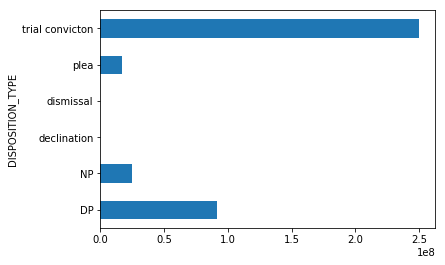

In [148]:
df.groupby('DISPOSITION_TYPE')['TOTAL_PAYMENT'].mean().plot(kind="barh")